# Project 4: Big Five Personality Traits - General Population & Celebrities [Twitter]

Ironhack: Data Part-Time: Zuzanna Orlowska 

# Notebook outline:

 <p> 1. Big Five Personality Traits - explanation </p>
 <p> 2. Hypotheses </p>
 <p> 3. Retrieving data </p>
 <p> 4. Exploring data </p>
 <p> 5. Trait-by-trait visualizations </p>
 <p> 6. Within-correlation Matrixes </p>
 <p> 7. Between-datasets correlations </p>
 <p> 8. Results </p>

# Big Five Personality Traits: Explanation

![alt text](../data/'bigfive.png', "Bigfive")

<p>"...The Big Five personality traits, also known as the five-factor model (FFM) and the OCEAN model, is a suggested taxonomy, or grouping, for personality traits, developed from the 1980s onwards. </p>

<p>"When factor analysis (a statistical technique) is applied to personality survey data, some words used to describe aspects of personality are often applied to the same person. </p>
For example, someone described as conscientious is more likely to be described as "always prepared" rather than "messy"."

<p>"This theory uses descriptors of common language and suggests five broad dimensions commonly used to describe the human personality and psyche."</p>

<p>"The theory identifies five factors:</p>

<p>* openness to experience (inventive/curious vs. consistent/cautious)</p>
<p>* conscientiousness (efficient/organized vs. easy-going/careless)</p>
<p>* extroversion (outgoing/energetic vs. solitary/reserved)</p>
<p>* agreeableness (friendly/compassionate vs. challenging/detached)</p>
<p>* neuroticism (sensitive/nervous vs. secure/confident)"</p>
<p> Source: Wikipedia :) </p>

# Big Five Personality Traits: Questions 

<p>EXT1    P   I am the life of the party.</p>
<p>EXT2    N   I don't talk a lot.</p>
<p>EXT3    P   I feel comfortable around people.</p>
<p>EXT4    N   I keep in the background.</p>
<p>EXT5    P   I start conversations.</p>
<p>EXT6    N   I have little to say.</p>
<p>EXT7    P   I talk to a lot of different people at parties.</p>
<p>EXT8    N   I don't like to draw attention to myself.</p>
<p>EXT9    P   I don't mind being the center of attention.</p>
<p>EXT10   N   I am quiet around strangers.</p>
<p>EST1    P   I get stressed out easily.</p>
<p>EST2    N   I am relaxed most of the time.</p>
<p>EST3    P   I worry about things.</p>
<p>EST4    N   I seldom feel blue.</p>
<p>EST5    P   I am easily disturbed.</p>
<p>EST6    P   I get upset easily.</p>
<p>EST7    P   I change my mood a lot.</p>
<p>EST8    P   I have frequent mood swings.</p>
<p>EST9    P   I get irritated easily.</p>
<p>EST10   P   I often feel blue.</p>
<p>AGR1    N   I feel little concern for others.</p>
<p>AGR2    P   I am interested in people.</p>
<p>AGR3    N   I insult people.</p>
<p>AGR4    P   I sympathize with others' feelings.</p>
<p>AGR5    N   I am not interested in other people's problems.</p>
<p>AGR6    P   I have a soft heart.</p>
<p>AGR7    N   I am not really interested in others.</p>
<p>AGR8    P   I take time out for others.</p>
<p>AGR9    P   I feel others' emotions.</p>
<p>AGR10   P   I make people feel at ease.</p>
<p>CSN1    P   I am always prepared.</p>
<p>CSN2    N   I leave my belongings around.</p>
<p>CSN3    P   I pay attention to details.</p>
<p>CSN4    N   I make a mess of things.</p>
<p>CSN5    P   I get chores done right away.</p>
<p>CSN6    N   I often forget to put things back in their proper place.</p>
<p>CSN7    P   I like order.</p>
<p>CSN8    N   I shirk my duties.</p>
<p>CSN9    P   I follow a schedule.</p>
<p>CSN10   P   I am exacting in my work.</p>
<p>OPN1    P   I have a rich vocabulary.</p>
<p>OPN2    N   I have difficulty understanding abstract ideas.</p>
<p>OPN3    P   I have a vivid imagination.</p>
<p>OPN4    N   I am not interested in abstract ideas.</p>
<p>OPN5    P   I have excellent ideas.</p>
<p>OPN6    N   I do not have a good imagination.</p>
<p>OPN7    P   I am quick to understand things.</p>
<p>OPN8    P   I use difficult words.</p>
<p>OPN9    P   I spend time reflecting on things.</p>
<p>OPN10   P   I am full of ideas.</p>

# Hypotheses:

<p>H0 = There is no difference between big 5 testing scores in general population vs celebrities</p>
<p>H1 = There is a significant difference between big 5 testing scores in general population vs celebrities</p>

# Retrieving Data:

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import geopandas as gpd
import pycountry
from scipy import stats
import statsmodels.api as sm

# RD: General Population

In [2]:
#General population Big 5 results 
general = pd.read_csv('../data/datageneral.csv', sep='\t')

In [3]:
#Exploring data - general 
general.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [4]:
#Cleaning - general 
#5 categories : op; co; ex; ag; ne
#1 = disagree; 3 = neutral; 5 = agree
start_rows = len(general)
general = general.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)
remove_rows = start_rows - len(general)
print('Removed', remove_rows ,'rows that had incomplete pieces of data.')
print('This was', (remove_rows/start_rows * 100),'of the total data.')
print('Number of countries:', len(set(general.country.values)))

Removed 149057 rows that had incomplete pieces of data.
This was 14.680486654237345 of the total data.
Number of countries: 223


# RD: Celebrities

In [5]:
#Celebrities Big 5 results 
celebrities = pd.read_csv('../data/datatwitter.csv')

In [6]:
#Cleaning - celebrities
start_rows2 = len(general)
celebrities = celebrities.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)
remove_rows2 = start_rows2 - len(general)
print('Removed', remove_rows2 ,'rows that had incomplete pieces of data.')
print('This was', (remove_rows2/start_rows2 * 100),'% of the total data.')

Removed 0 rows that had incomplete pieces of data.
This was 0.0 % of the total data.


In [7]:
#Renaming columns to match - celebrities 
celebrities.rename({'op': 'OPN_CEL', 'ex': 'EXT_CEL', 'ne':'NEU_CEL', 'ag':'AGR_CEL', 'co': 'CSN_CEL'}, axis=1, inplace=True)
celebrities.head()

,usuario,OPN_CEL,CSN_CEL,EXT_CEL,AGR_CEL,NEU_CEL,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


# Exploring data

# Exploring data: General Population 

In [8]:
#Exploring data - general; NAAN
#general.info()

In [9]:
#Countries
country_dict = {i.alpha_2: i.alpha_3 for i in pycountry.countries}
countries = pd.DataFrame(general.country.value_counts()).T\
              .drop('NONE', axis=1)\
              .rename(columns=country_dict, index={'country': 'count'})
countries_rank = countries.T.rename_axis('iso_a3').reset_index()
countries_rank['rank'] = countries_rank['count'].rank()
countries_rank.T

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
iso_a3,USA,GBR,CAN,AUS,PHL,IND,DEU,NZL,MYS,MEX,...,MHL,SHN,BDI,TCD,FLK,GNQ,COM,BFA,GIN,BEN
count,468888,57371,53258,42935,16286,13640,12306,11205,9734,9298,...,1,1,1,1,1,1,1,1,1,1
rank,222,221,220,219,218,217,216,215,214,213,...,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5,7.5


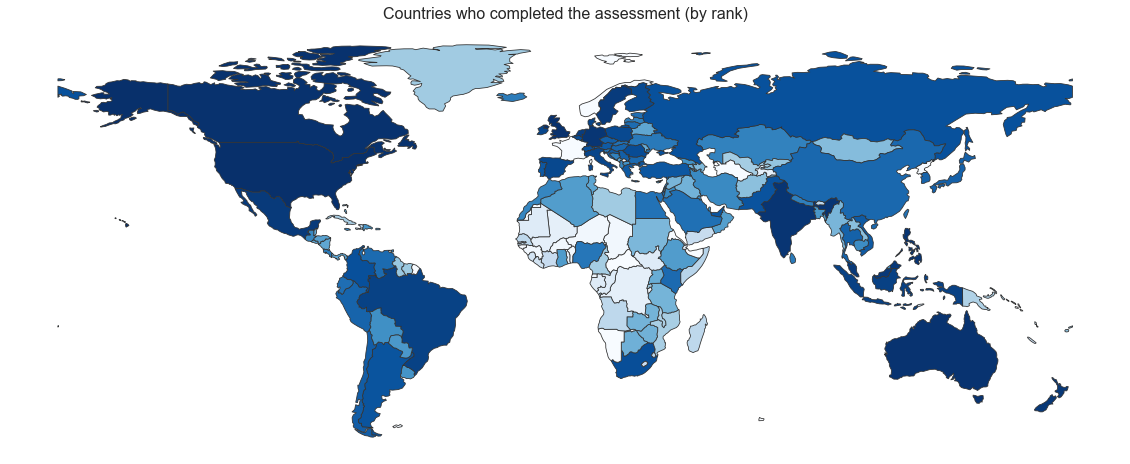

In [10]:
#Plotting Countries present in the General Population dataset
sns.set_style("white")

file = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(file)
world = pd.merge(world, right=countries_rank, how='left', on='iso_a3').fillna(0)
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Countries who completed the assessment (by rank)', size=16)
world.drop(159).plot(column='rank', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.2'); sns.set()
plt.box(on=None)

In [11]:
#Former research - Getting to true values via subtracting the Negative points from the Positive 
pos_questions = [ # positive questions adding to the trait.
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 Extroversion
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 Neuroticism
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 Agreeableness
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 Conscientiousness
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 Openness
]
neg_questions = [ # negative (negating) questions subtracting from the trait.
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 Extroversion
    'EST2','EST4',                       # 2 Neuroticism
    'AGR1','AGR3','AGR5','AGR7',         # 4 Agreeableness
    'CSN2','CSN4','CSN6','CSN8',         # 4 Conscientiousness
    'OPN2','OPN4','OPN6',                # 3 Openness
]

general[pos_questions] = general[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
general[neg_questions] = general[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})
cols = pos_questions + neg_questions
general = general[sorted(cols)]
general.head()

,AGR1,AGR10,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,...,OPN1,OPN10,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9
0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0
1,2.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,...,-2.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0
2,2.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,1.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0
4,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0


In [12]:
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
#trait_labels = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
for trait in traits:
    trait_cols = sorted([col for col in general.columns if trait in col and '_E' not in col])
    general[trait] = general[trait_cols].sum(axis=1)
general[traits].head(10)

,EXT,EST,AGR,CSN,OPN
0,16.0,-6.0,9.0,2.0,15.0
1,-10.0,-5.0,14.0,7.0,5.0
2,-5.0,-4.0,12.0,4.0,11.0
3,-4.0,-1.0,8.0,-5.0,9.0
4,-1.0,-11.0,16.0,18.0,18.0
5,2.0,-8.0,8.0,7.0,14.0
6,5.0,0.0,11.0,3.0,13.0
7,12.0,-14.0,8.0,15.0,13.0
8,-8.0,1.0,-11.0,-13.0,5.0
9,-1.0,9.0,7.0,-6.0,20.0


In [13]:
#Renaming columns to match - general 
#trait_labels = ['Extroversion', 'Neuroticism', 'Agreeableness', 'Conscientiousness', 'Openness']
generaltrait = pd.DataFrame(general[traits])
generaltrait.rename({'EXT': 'EXT_GEN', 'EST': 'NEU_GEN', 'AGR': 'AGR_GEN', 'CSN': 'CSN_GEN', 'OPN':'OPN_GEN'}, axis=1, inplace=True)
generaltrait.head()

,EXT_GEN,NEU_GEN,AGR_GEN,CSN_GEN,OPN_GEN
0,16.0,-6.0,9.0,2.0,15.0
1,-10.0,-5.0,14.0,7.0,5.0
2,-5.0,-4.0,12.0,4.0,11.0
3,-4.0,-1.0,8.0,-5.0,9.0
4,-1.0,-11.0,16.0,18.0,18.0


In [14]:
generaltrait.mean(axis = 0)

EXT_GEN   -0.402278
NEU_GEN    0.669173
AGR_GEN    7.741817
CSN_GEN    3.661276
OPN_GEN    8.991453
dtype: float64

In [15]:
generaltrait.std(axis = 0)

EXT_GEN    9.104958
NEU_GEN    8.585351
AGR_GEN    7.292177
CSN_GEN    7.374046
OPN_GEN    6.299519
dtype: float64

# Exploring data: Celebrities 

In [16]:
#Explore
#celebrities.info()

In [17]:
celebrities.mean(axis = 0)

OPN_CEL      44.414591
CSN_CEL      22.977135
EXT_CEL      40.764428
AGR_CEL      22.918528
NEU_CEL       8.000098
wordcount    98.715484
categoria     4.050000
dtype: float64

In [18]:
celebrities.std(axis = 0)

OPN_CEL       8.425723
CSN_CEL       5.816851
EXT_CEL       7.185246
AGR_CEL       7.657122
NEU_CEL       3.039248
wordcount    44.714071
categoria     2.658839
dtype: float64

# Trait-by-Trait Visualization 

# TbT: Extroversion 

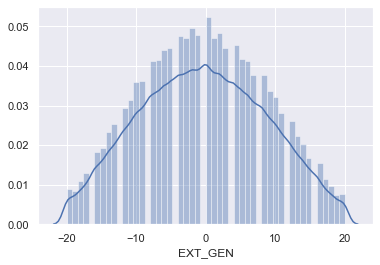

In [19]:
sns.distplot(generaltrait['EXT_GEN'])

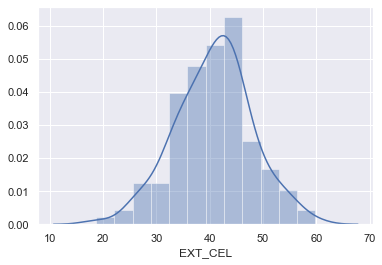

In [20]:
sns.distplot(celebrities['EXT_CEL'])

# TbT:  Neuroticism 

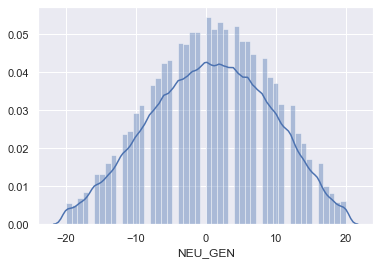

In [21]:
sns.distplot(generaltrait['NEU_GEN'])

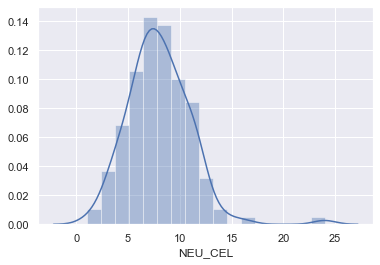

In [22]:
sns.distplot(celebrities['NEU_CEL'])

# TbT: Agreableness 

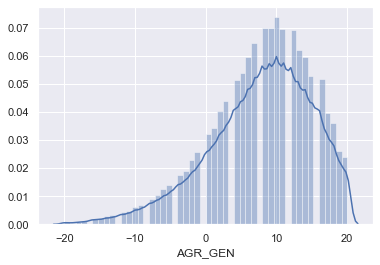

In [23]:
sns.distplot(generaltrait['AGR_GEN'])

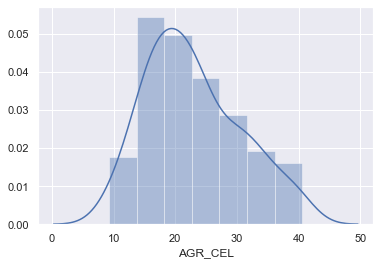

In [24]:
sns.distplot(celebrities['AGR_CEL'])

# Tbt: Conscientiousness

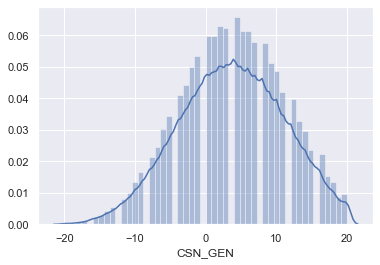

In [25]:
sns.distplot(generaltrait['CSN_GEN'])

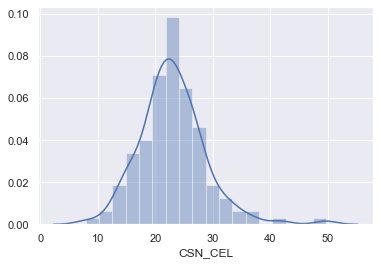

In [26]:
sns.distplot(celebrities['CSN_CEL'])

# TbT: Openness 

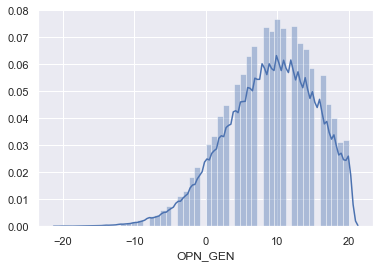

In [27]:
sns.distplot(generaltrait['OPN_GEN'])

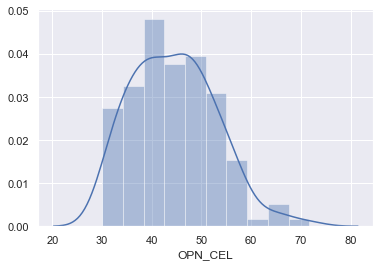

In [28]:
sns.distplot(celebrities['OPN_CEL'])

# Within-Correlation Matrices 

# General

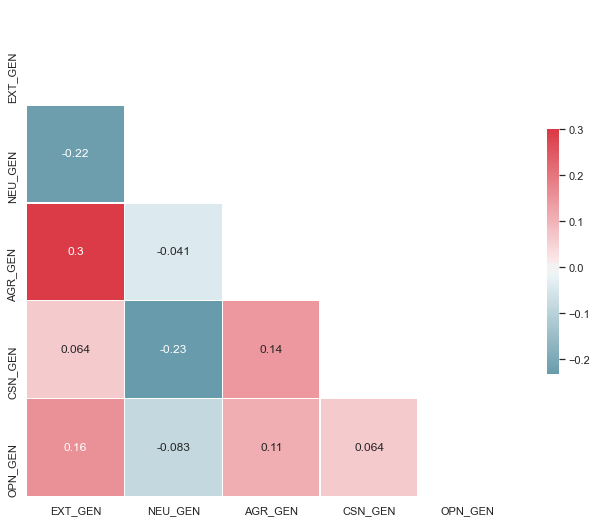

In [29]:
# your code here
sns.set(style="white")
# Compute the correlation matrix
corr = generaltrait.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

# Celebrities

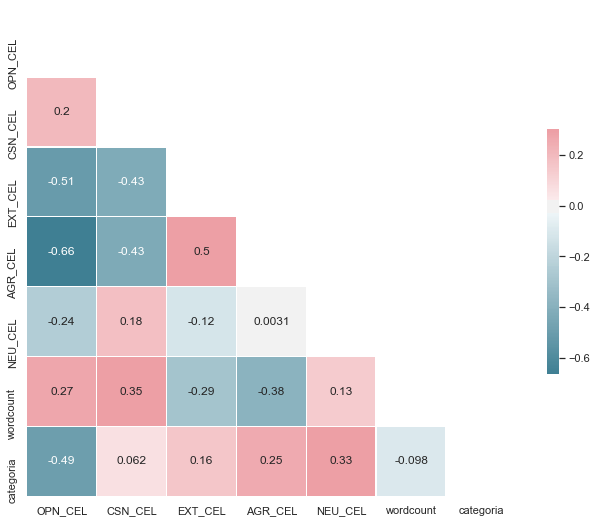

In [30]:
#Correlation Vizualization - celebrities - Matrix 
# your code here
sns.set(style="white")
# Compute the correlation matrix
corr = celebrities.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
#should drop the unnecc cols 

# Between-datasets Correlations

# Trait-by-Trait

Trait-by-Trait correlations are built with Pearson's correlation. 
Here, a high p-value would suggest a high correlation. 

In [31]:
#Extroversion 
EXT1= generaltrait["EXT_GEN"]
EXT2= celebrities["EXT_CEL"]
EXTcorrelation = EXT1.corr(EXT2)
print('EXT Correlation:', EXTcorrelation)

EXT Correlation: 0.22032558197973864


In [32]:
#Openess 
OPN1= generaltrait["OPN_GEN"]
OPN2= celebrities["OPN_CEL"]
OPNcorrelation = OPN1.corr(OPN2)
print('OPN Correlation:', OPNcorrelation)

OPN Correlation: 0.07743060293907525


In [33]:
#Agreeableness 
AGR1= generaltrait["AGR_GEN"]
AGR2= celebrities["AGR_CEL"]
AGRcorrelation = AGR1.corr(AGR2)
print('AGR Correlation:', AGRcorrelation)

AGR Correlation: -0.013237526078890952


In [34]:
#Conscientiousness 
CSN1= generaltrait["CSN_GEN"]
CSN2= celebrities["CSN_CEL"]
CSNcorrelation = CSN1.corr(CSN2)
print('CSN Correlation:', CSNcorrelation)

CSN Correlation: -0.07767558224616425


In [35]:
#Neuroticism 
NEU1= generaltrait["NEU_GEN"]
NEU2= celebrities["NEU_CEL"]
NEUcorrelation = NEU1.corr(NEU2)
print('NEU Correlation:', NEUcorrelation)

NEU Correlation: 0.030980242503931932


# Mann-Whitney U test 

Correlation testing - test choice 
<p>Type of values: Ordinal [testing scale 1 - 3- 5]</p>
<p>Purpose: Examining differences between populations</p>
<p>Measuring: Independent values </p>
<p>Using: Mann-Whitney U test</p>
<p>Difference between MW & t-test: T-test is parametric; WMW is for non-parametric.</p>
<p>Here, a low p-value suggests a correlation. </p>

In [36]:
from scipy.stats import mannwhitneyu

EXTMWT = mannwhitneyu(generaltrait["EXT_GEN"], celebrities["EXT_CEL"])
print ('Extroversion MW:', EXTMWT)
OPNMWT = mannwhitneyu(generaltrait["OPN_GEN"], celebrities["OPN_CEL"])
print ('Openess MW:', OPNMWT)
AGRMWT = mannwhitneyu(generaltrait["AGR_GEN"], celebrities["AGR_CEL"])
print ('Agreeableness MW:', AGRMWT)
CSNMWT = mannwhitneyu(generaltrait["CSN_GEN"], celebrities["CSN_CEL"])
print ('Conscentiousness MW:', CSNMWT)
NEUMWT = mannwhitneyu(generaltrait["NEU_GEN"], celebrities["NEU_CEL"])
print ('Neuroticism MW:', NEUMWT )

Extroversion MW: MannwhitneyuResult(statistic=10266.0, pvalue=1.1061506466216585e-93)
Openess MW: MannwhitneyuResult(statistic=0.0, pvalue=7.895118751528455e-94)
Agreeableness MW: MannwhitneyuResult(statistic=7089615.0, pvalue=1.2490479429846481e-73)
Conscentiousness MW: MannwhitneyuResult(statistic=1675058.0, pvalue=8.830430170164033e-89)
Neuroticism MW: MannwhitneyuResult(statistic=27355789.0, pvalue=1.1057176286998629e-29)


# Predictions using OLS

There is a negative correlation between Extroversion [-0.51] and Agreeableness [-0.66] with the Openness Trait in the Celebrities dataset. I am using a linear reg. OLS model to see if we can predict Openness successfully based on the data. 

In [38]:
X = celebrities[['AGR_CEL', 'EXT_CEL']]
Y = celebrities['OPN_CEL'] 
model= sm.OLS(Y,X).fit()
predictions=model.predict(X)
pd.DataFrame({'observed':Y, 'predicted':predictions})

,observed,predicted
0,34.297953,40.466577
1,44.986842,37.821936
2,41.733854,33.689376
3,40.377154,53.468042
4,36.664677,48.337466
...,...,...
135,35.569389,35.180729
136,31.960417,43.541383
137,71.696129,26.709685
138,51.537405,36.528553


Doing the same for Conscientiousness Trait and Agreeableness and Extroversion [both at -0.41]. Attempting OLS prediction here. 

In [39]:
X = celebrities[['AGR_CEL', 'EXT_CEL']]
Y = celebrities['CSN_CEL'] 
model= sm.OLS(Y,X).fit()
predictions=model.predict(X)
pd.DataFrame({'observed':Y, 'predicted':predictions})

,observed,predicted
0,28.148819,21.410849
1,20.525865,19.792905
2,13.745417,18.527828
3,15.377462,27.757379
4,19.642258,25.303423
...,...,...
135,22.133740,19.033995
136,15.416979,23.623349
137,12.489274,14.111944
138,26.009695,19.085674


For the General dataset, the largest correlation is between Extroversion and Agreeableness [0.3]; but the OLS model returns an error. The above predictions are not perfect, but they illustrate how the data can be predicted in the future. 

# Results 

# Hypotheses :

Reminding hypotheses: 
<p>H0 = There is no difference between big 5 testing scores in general population vs celebrities</p>
<p>H1 = There is a significant difference between big 5 testing scores in general population vs celebrities</p>

<p>Results: 
    <p>The p-values are quite high in the WMW tests, and low in Pearson's. </p>
    <p>That shows that there is no predictive relationship between the variables. </p>
    <p>Therefore - the values are not significantly different from one another.</p>
    <p>H0 is accepted. </p>

# General Results:

# General Dataset 

Inter-correlations

<p>Extraversion is positively correlated with Agreeableness (0.3)</p>
<p>Agreeableness is slightly positively correlated with Conscientiousness (0.14) and Openness (0.11)</p>
<p> Conscientiousness and Neuroticism are negatively correlated (-0.23)</p>
<p>Extraversion is negatively correlated with Neuroticism (-0.22)</p>

# Celebrities Dataset

Inter-correlations

<p> Openness is negatively correlated with Agreeableness (-0.66), Extroversion (-0.51) and Neuroticism (-0.24)</p>
<p> Conscientiousness  is negatively correlated with Agreeableness and Extroversion (-0.43)</p>
<p> Wordcount is negatively correlated with Agreeableness (-0.38). and Extroversion (-0.29) </p>
<p> Wordcount is positively correlated with Conscientiousness (0.35) and Openness (0.27) </p>

# Trait-by-Trait Correlations 

<p> Extroversion </p>
<p> </p>
<p> Both the General population and the Celebrities dataset show a mostly normal distribution, but the Celebrities dataset is strongly centered between the values of 30 and 45. The general dataset is almost perfectly normally distributed, with values ranging from -20 to 20.   </p>
<p> Neuroticism </p>
<p> </p>
<p>  The General dataset is normally distributed, ranging between -20 and 20. The Celebrities dataset is normally distributed between 0 and 15 points, but also has a lagging tail at 20 to 25 points. </p>
<p> Agreableness </p>
<p> </p>
<p> The General dataset is skewed to the right, with most data falling between 0 and 20 points. The Celebrities dataset is skewed to the left, with most data falling between 15 and 30 points.  </p>
<p> Openness  </p>
<p> </p>
<p> The General dataset is skewed to the right, being mostly normally distributed between 0 and 20 points (sharp end), and with a tail from -20 to 0 points.  Quite visibly, most data in the Celebrities dataset fall between 30 and 55 points, with a strong peak at 40 points. There is some data that falls in the 60 - 70 points range.</p>
<p> Conscientiousness</p>
<p> </p>
<p> The General dataset is normally distributed, ranging between -20 and 20. The Celebrities dataset is normally distributed between 0 and 40, but with a tail between 40 and 50. It has a strong peak at 25 points. </p>